# Labeling Zalando pics

## Miguel Ángel Canela, IESE Business School

******

### Introduction

This example illustrates the use of **neural networks** for **image classification**. The data are 70,000 labeled 28 x 28 grayscale images of **Zalando's articles**. The labels are associated to the following articles: T-shirt/top (0), trousers (1), pullover (2), dress (3), coat (4), sandal (5), shirt (6), sneaker (7), bag (8) and ankle boot (9).

These data were intended to serve as a direct drop-in replacement for the MNIST data for benchmarking machine learning algorithms. They share the image size and structure of training and testing splits. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel. This pixel-value is an integer between 0 and 255 (Black = 0, White = 255). In the data set, every row stands for an image. The label is in the first column, and the rest of the columns contain the pixel-values of the image. 

### Importing the data

Since the original data set was too big to be posted on GitHub in CSV format, it has been partitioned into seven subsets, which I import one by one. Then, I put them together with the Pandas function `concat`.

In [1]:
import pandas as pd
folder = 'https://raw.githubusercontent.com/mcanela-iese/ML_Course/master/Data/'
df1 = pd.read_csv(folder + 'zalando1.csv')
df2 = pd.read_csv(folder + 'zalando2.csv')
df3 = pd.read_csv(folder + 'zalando3.csv')
df4 = pd.read_csv(folder + 'zalando4.csv')
df5 = pd.read_csv(folder + 'zalando5.csv')
df6 = pd.read_csv(folder + 'zalando6.csv')
df7 = pd.read_csv(folder + 'zalando7.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)

In [2]:
df.shape

(70000, 785)

Let me explore the columns of this data set.

In [3]:
df.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 9999
Data columns (total 10 columns):
label     70000 non-null int64
pixel1    70000 non-null int64
pixel2    70000 non-null int64
pixel3    70000 non-null int64
pixel4    70000 non-null int64
pixel5    70000 non-null int64
pixel6    70000 non-null int64
pixel7    70000 non-null int64
pixel8    70000 non-null int64
pixel9    70000 non-null int64
dtypes: int64(10)
memory usage: 5.9 MB


The first column is the label identifying the article, and the other 784 columns correspond to the image pixels, read row-by-row. I split the data frame into a **features matrix** and a **target vector** as usual.

In [4]:
import numpy as np
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

The contents of the target vector are the 10 article labels. The data set is perfectly balanced. 

In [5]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000, 7000]))

The contents of the feature matrix are integers from 0 to 255, which stand for gray intensities (8-bit grayscale). I normalize this into the 0-1 range.

In [6]:
np.unique(X)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
X = X/255

As it is usually done with MNIST data set, I keep 10,000 images for testing. I split the data with the class `train_test_split` of the scikit-learn module `model_selection`.  

In [8]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=1/7)

### Plotting

Before addressing the classification task, let me show you what these images are.

In [9]:
import matplotlib.pyplot as plt

Since these are grayscale images, I set `pyplot` so.

In [10]:
plt.gray()

<Figure size 432x288 with 0 Axes>

I start plotting a T-shirt.

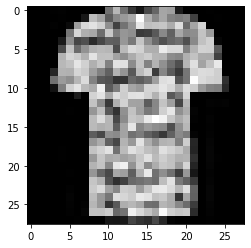

In [11]:
X0 = X[y == 0, :]
plt.imshow(X0[0, :].reshape(28,28))
plt.show()

It will be better to use the negative.

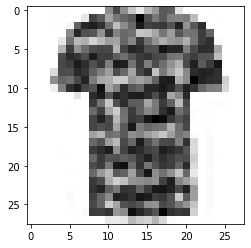

In [12]:
plt.imshow(1 - X0[0, :].reshape(28,28))
plt.show()

Next, I plot an instance of trousers.

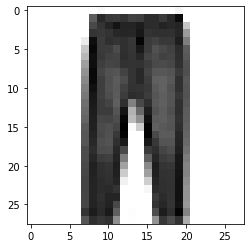

In [13]:
X1 = X[y == 1, :]
plt.imshow(1 - X1[1, :].reshape(28,28))
plt.show()

Et cetera.

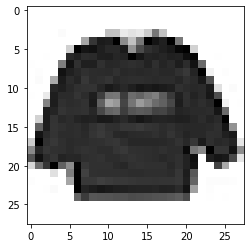

In [14]:
X2 = X[y == 2, :]
plt.imshow(1 - X2[0, :].reshape(28,28))
plt.show()

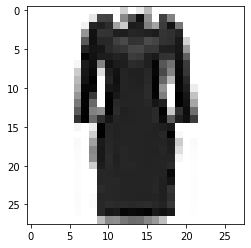

In [15]:
X3 = X[y == 3, :]
plt.imshow(1 - X3[0, :].reshape(28,28))
plt.show()

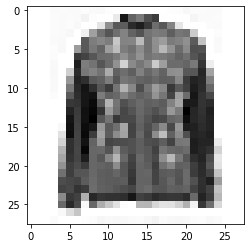

In [16]:
X4 = X[y == 4, :]
plt.imshow(1 - X4[0, :].reshape(28,28))
plt.show()

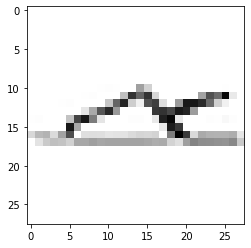

In [17]:
X5 = X[y == 5, :]
plt.imshow(1 - X5[0, :].reshape(28,28))
plt.show()

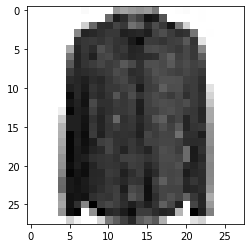

In [18]:
X6 = X[y == 6, :]
plt.imshow(1 - X6[0, :].reshape(28,28))
plt.show()

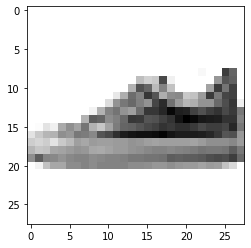

In [19]:
X7 = X[y == 7, :]
plt.imshow(1 - X7[0, :].reshape(28,28))
plt.show()

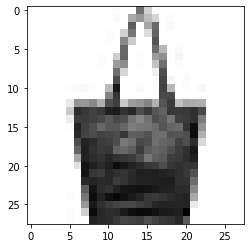

In [20]:
X8 = X[y == 8, :]
plt.imshow(1 - X8[0, :].reshape(28,28))
plt.show()

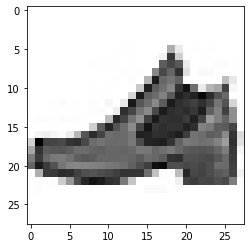

In [21]:
X9 = X[y == 9, :]
plt.imshow(1 - X9[0, :].reshape(28,28))
plt.show()

In [22]:
from sklearn import ensemble
rfclf = ensemble.RandomForestClassifier(max_leaf_nodes=128, n_estimators=10)
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=128,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
round(rfclf.score(X_train, y_train), 3)

0.842

In [24]:
round(rfclf.score(X_test, y_test), 3)

0.833

No serious overfitting, but lower performance than with the MINST digits. So, this data set looks promising as a benchmark for image classification methods.

### Multilayer perceptron classifier

I go now for the neural network model. The scikit-learn module `neural_network` contains the class `MLPClassifier`, which provides **multilayer perceptron** classifiers. The argument `hidden_layer_sizes` sets the hidden layer architecture. The defaults are, in general, acceptable, except that of the number of iterations or **epochs**, `max_iter=200`, which typically leads to overfitting, as we see below.

Fitting this model to our data takes a bit of time. Note that, with `batch_size=200` (default) and 60,000 training observations, each iteration involves 300 adjustments of the parameters, one per batch.

In [25]:
from sklearn import neural_network
mlpclf = neural_network.MLPClassifier(hidden_layer_sizes=(32))
mlpclf.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=32, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Note that the number of iterations is an upper tolerance limit, which in most cases is not attained, because **convergence** is achieved before the maximum number of iterations have been performed. Convergence means here that the succesive iterations do not improve the fit beyond a threshold (given by `tol=0.0001`). The problem is that, improving the fit to the training data, we can stop the model to be generalizable to other data, creating an overfitting problem. Many practitioners prefer to set a low value for `max_iter` (to increase `tol` would have a similar effect).

I get here a warning about nonconvergence. Such a warning may suggest that I am doing something wrong. Not really, I was just trying to prevent overfitting by not allowing the model to "improve" too much the predictions on the training data. Unsuccessfully, as we see now.

In [26]:
round(mlpclf.score(X_train, y_train), 3)

0.946

In [27]:
round(mlpclf.score(X_test, y_test), 3)

0.877

We can take the performance on the test data as an assessment of the model. I try now a faster approach.

In [31]:
from sklearn import neural_network
mlpclf = neural_network.MLPClassifier(hidden_layer_sizes=(32), max_iter=10)
mlpclf.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=32, learning_rate='constant',
              learning_rate_init=0.001, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [32]:
round(mlpclf.score(X_train, y_train), 3)

0.878

In [33]:
round(mlpclf.score(X_test, y_test), 3)

0.87

So, 87% accuracy looks like our ceiling with an MLP model with a hidden layer. Putting more layers or more nodes in the layer does not seem to improve the performance.

### Source of the data

github.com/zalandoresearch/fashion-mnist